sentiment counts: Index(['positive', 'negative'], dtype='object', name='sentiment') : [25000 25000]


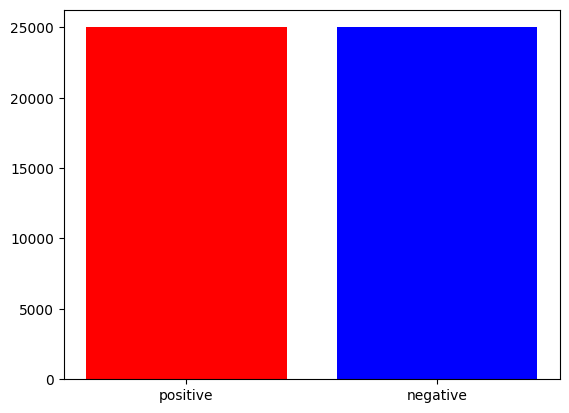

  sentiment tb_sentiment
0  positive     positive
1  positive     positive
2  positive     positive
3  negative     negative
4  positive     positive
5  positive     positive
6  positive     positive
7  negative     positive
8  negative     negative
9  positive     positive


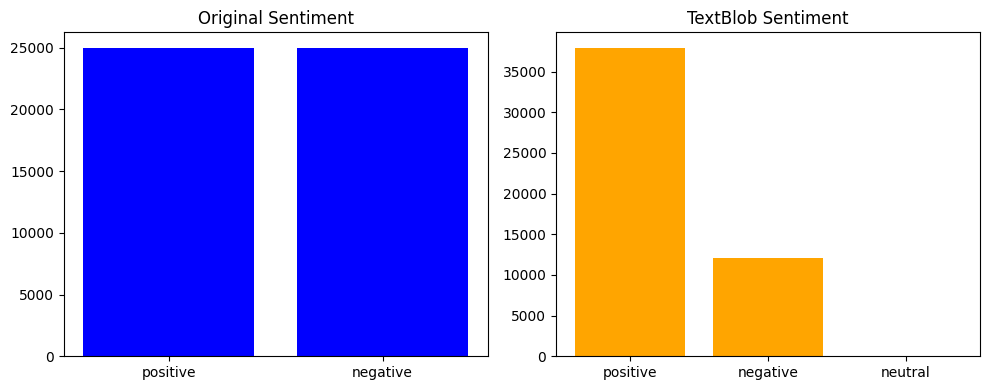

TextBlob vs Original IMDb Labels
Accuracy: 0.68828
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.43      0.58     25000
    positive       0.62      0.95      0.75     25000

    accuracy                           0.69     50000
   macro avg       0.76      0.69      0.67     50000
weighted avg       0.76      0.69      0.67     50000



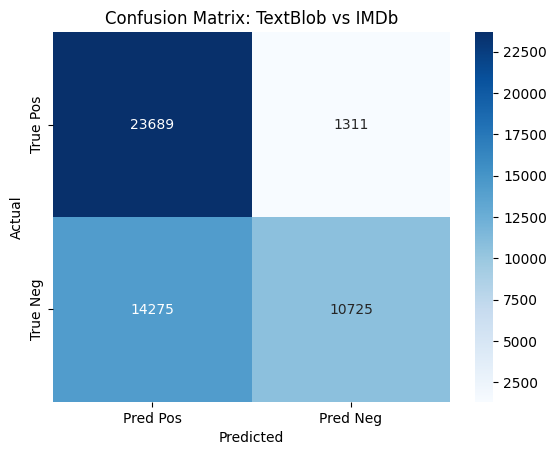

Supervised Model (Logistic Regression) Performance:
Accuracy: 0.8942
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



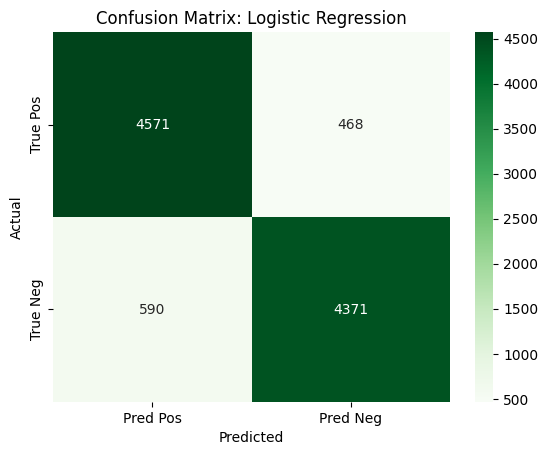

['tfidf_vectorizer.pkl']

In [16]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv("C://Users//1011s//Desktop//AIB//imdb//IMDB Dataset.csv")

sentiment_counts = data['sentiment'].value_counts()
print('sentiment counts:', sentiment_counts.index, ':', sentiment_counts.values)
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'blue'])
plt.show()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    return text

data['clean_review'] = data['review'].apply(clean_text)

data['polarity'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

def label_sentiment(p):
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else:
        return 'neutral'

data['tb_sentiment'] = data['polarity'].apply(label_sentiment)

data['tb_sentiment_binary'] = data['tb_sentiment'].apply(lambda x: 'positive' if x == 'neutral' else x)

print(data[['sentiment', 'tb_sentiment']].head(10))

blob_counts = data['tb_sentiment'].value_counts()
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(sentiment_counts.index, sentiment_counts.values, color='blue')
plt.title('Original Sentiment')

plt.subplot(1, 2, 2)
plt.bar(blob_counts.index, blob_counts.values, color='orange')
plt.title('TextBlob Sentiment')

plt.tight_layout()
plt.show()

print("TextBlob vs Original IMDb Labels")
print("Accuracy:", accuracy_score(data['sentiment'], data['tb_sentiment_binary']))
print("Classification Report:\n", classification_report(data['sentiment'], data['tb_sentiment_binary']))

cm = confusion_matrix(data['sentiment'], data['tb_sentiment_binary'], labels=['positive', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Pos', 'Pred Neg'], yticklabels=['True Pos', 'True Neg'])
plt.title("Confusion Matrix: TextBlob vs IMDb")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

X = data['clean_review']
y = data['sentiment']

vectorizer = TfidfVectorizer(max_features=5000)
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Supervised Model (Logistic Regression) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Pred Pos', 'Pred Neg'], yticklabels=['True Pos', 'True Neg'])
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

import joblib
joblib.dump(model, "logreg_imdb.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


In [17]:
predict_script = """
import joblib
import re
import sys

model = joblib.load("logreg_imdb.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

text = sys.argv[1]
text_clean = re.sub(r"[^a-zA-Z]", " ", text.lower())
vect_text = vectorizer.transform([text_clean])
pred = model.predict(vect_text)
print("Prediction:", pred[0])
"""

with open("predict.py", "w") as f:
    f.write(predict_script)
